## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## Data

In [2]:
data = pd.read_csv('Health_Sleep_Statistics.csv')

In [3]:
data.head(3)

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no


In [4]:
data['Sleep Quality'].value_counts()

Sleep Quality
8    25
9    25
5    13
6    13
7    12
4    12
Name: count, dtype: int64

## Categorical Features to Numerical

In [5]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

In [6]:
label_encoder = LabelEncoder()
for column in categorical_cols:
    data[column] = label_encoder.fit_transform(data[column])

In [7]:
X = data.drop(['Sleep Quality'],axis = 1)
y = data['Sleep Quality']

## Data Splitting

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Classifier

In [9]:
clf = RandomForestClassifier(n_estimators=100,criterion='gini').fit(X_train,y_train)

## Accuracy

In [10]:
pred = clf.predict(X_test)
predt = clf.predict(X_train)

print(f'Train Accuracy: {accuracy_score(y_train,predt)*100:.2f}%')
print(f'Test Accuracy: {accuracy_score(y_test,pred)*100:.2f}%')

Train Accuracy: 100.00%
Test Accuracy: 96.67%


## Confusion Matrix

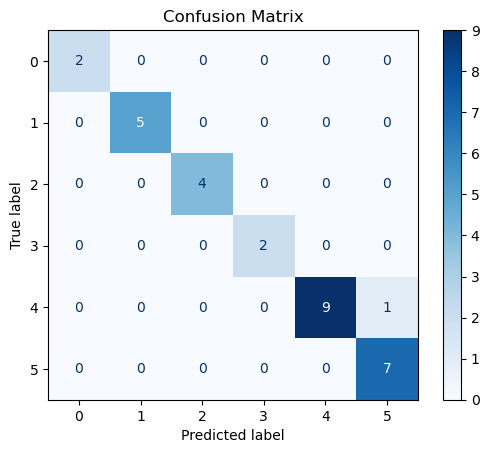

In [11]:
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Feature Importance

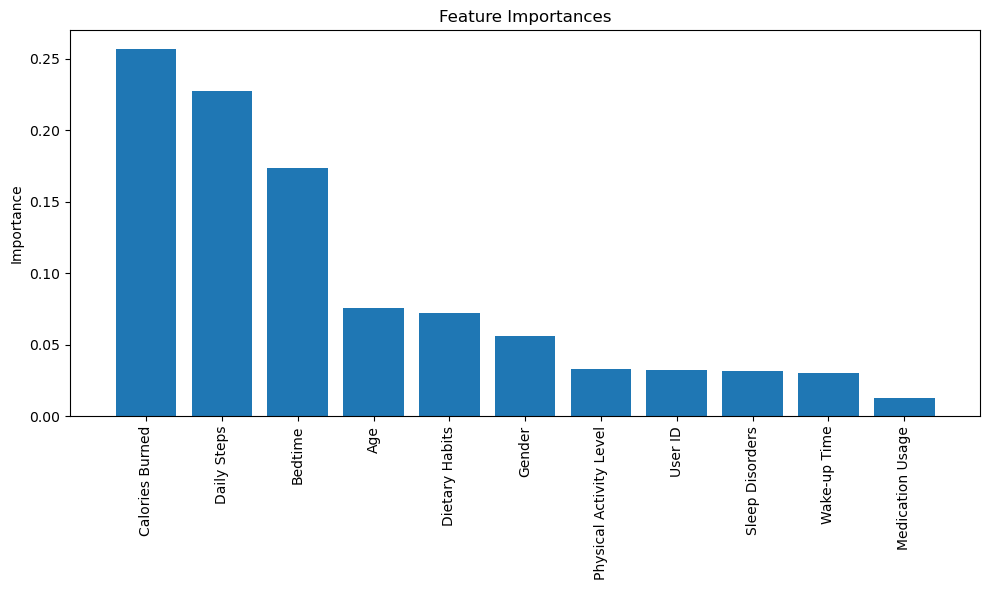

In [12]:
feature_importances = clf.feature_importances_
feature_names = clf.feature_names_in_

indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(feature_importances)), feature_importances[indices], align='center')
plt.xticks(range(len(feature_importances)), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, len(feature_importances)])
plt.ylabel("Importance")
plt.tight_layout()
plt.show()